In [ ]:
!pip install lxml
!pip install requests
!pip install bs4
!pip install pandas
!pip install numpy
!pip install json
!pip install tqdm
!pip install folium
!pip install seaborn
!pip install matplotlib.pyplot
!pip install missingno

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, StandardScaler

from phik.report import plot_correlation_matrix
# from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
data = pd.read_csv('Copy of Выгрузка.csv.xlsx - Copy of Выгрузка.csv.xls.csv')

In [ ]:
data

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


In [ ]:
data['Исх. №\nДата'] = data['Исх. №\nДата'].replace('\n', ' ', regex=True)

In [ ]:
data

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


In [ ]:
data = data.fillna('Pisto')

In [ ]:
data

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,Pisto
1,2,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,Pisto
2,3,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,Pisto
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,Pisto
4,5,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,Pisto
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,Pisto
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,Pisto
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,Pisto
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр 24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,Pisto


#  Предобработка данных и выделение значимых атрибутов


In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,3436,96,2117,143,85,262,11
1,2,3435,96,850,143,724,2869,11
2,3,3431,96,4057,143,1827,545,11
3,4,3429,96,3981,48,313,2613,11
4,5,3427,96,1727,143,113,2977,11


In [ ]:
encoded_data

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,3436,96,2117,143,85,262,11
1,2,3435,96,850,143,724,2869,11
2,3,3431,96,4057,143,1827,545,11
3,4,3429,96,3981,48,313,2613,11
4,5,3427,96,1727,143,113,2977,11
...,...,...,...,...,...,...,...,...
4962,4963,3564,8,1393,143,1069,3848,11
4963,4964,3566,8,4522,143,1541,3558,11
4964,4965,3563,8,4237,143,1232,3853,11
4965,4966,3562,8,4236,143,1232,3853,11


In [19]:
correlation_matrix = encoded_data.corr()
important_features = correlation_matrix['Адресат'].abs().sort_values(ascending=False).index

# Выбор только значимых атрибутов
df_selected_features = encoded_data[important_features]

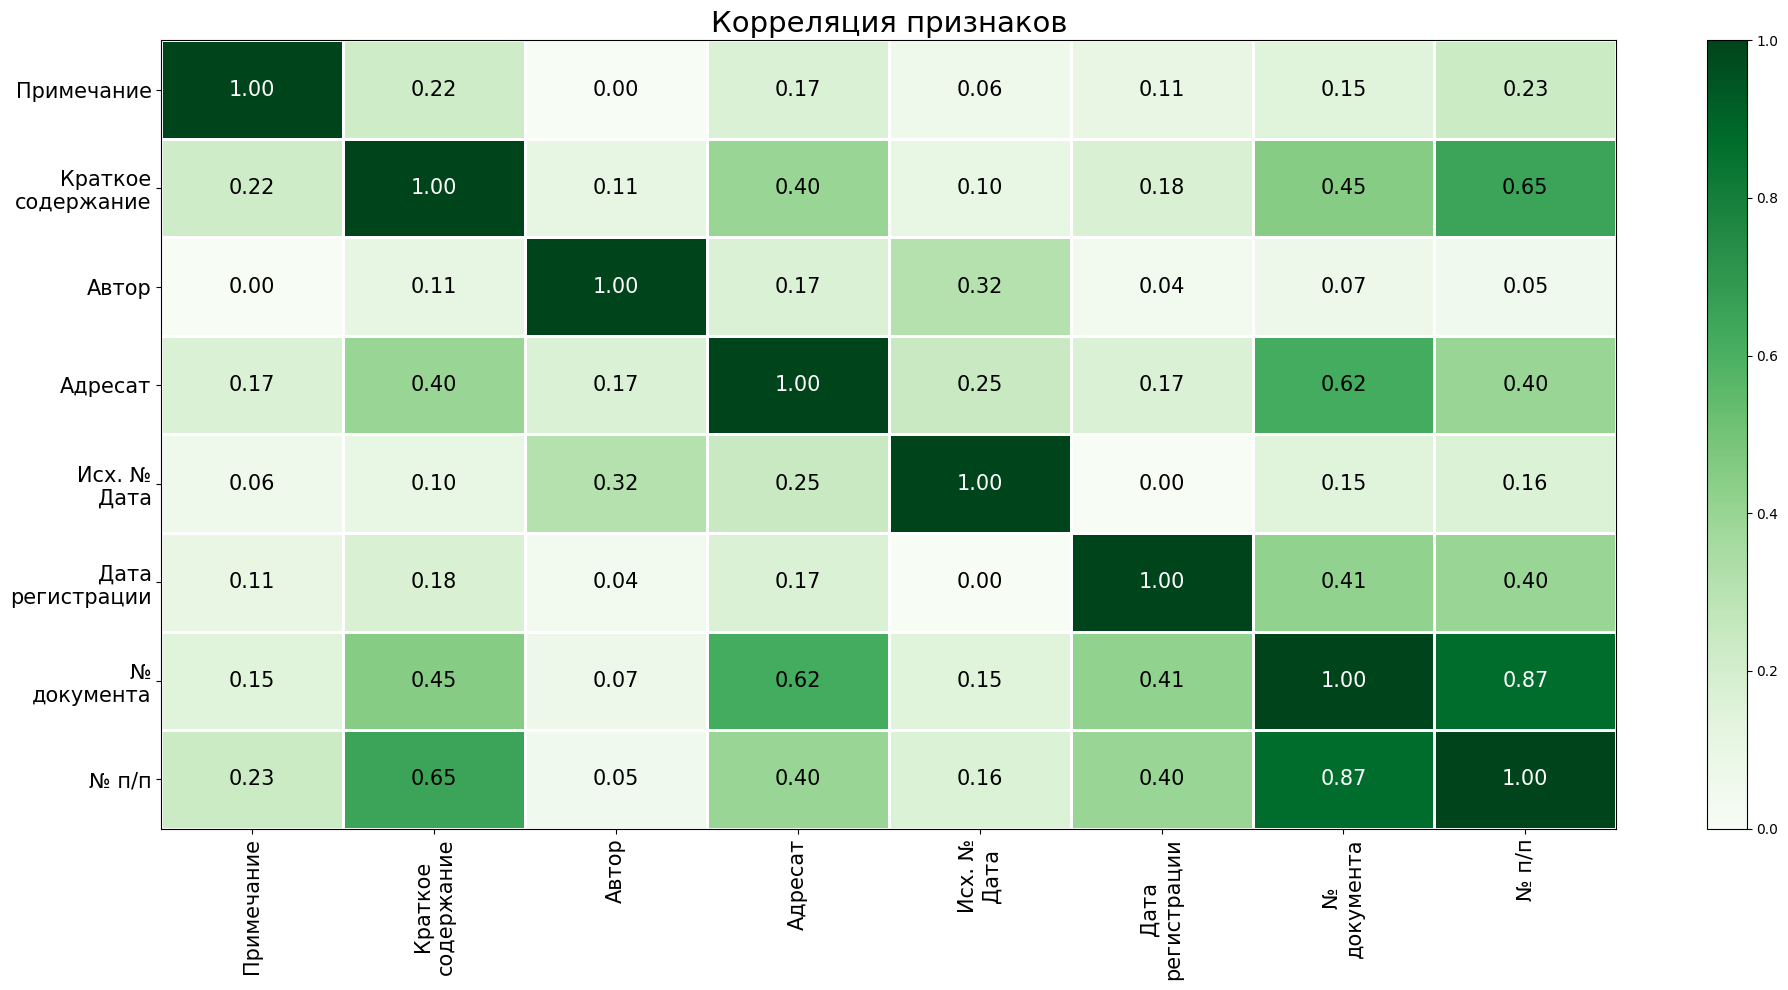

In [15]:
features_target = encoded_data
interval_cols = encoded_data
phik_overview = features_target.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Корреляция признаков",
                        fontsize_factor=1.5,
                        figsize=(20, 10))
plt.tight_layout()

In [ ]:
correlation_matrix = df_encoded.corr()
important_features = correlation_matrix['целевой_признак'].abs().sort_values(ascending=False).index

# Выбор только значимых атрибутов
df_selected_features = df_encoded[important_features]